In [1]:
import torch

# Check if CUDA is available
cuda_available = torch.cuda.is_available()
print(f"CUDA Available: {cuda_available}")

# Check the CUDA version
cuda_version = torch.version.cuda
print(f"CUDA Version: {cuda_version}")

# Check the number of available GPUs
num_gpus = torch.cuda.device_count()
print(f"Number of GPUs: {num_gpus}")

# If GPUs are available, print their names
for i in range(num_gpus):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
    folder_path = 'C://Users//path'

CUDA Available: True
CUDA Version: 12.1
Number of GPUs: 1
GPU 0: NVIDIA GeForce RTX 3060 Laptop GPU


## Make Prediction 

In [5]:
from ultralytics import YOLO

# Load a pretrained YOLOv8 model
model = YOLO('best36_class.pt')

# Run inference on a single image file
image_path = 'data/Duhat_test'  # Replace with your actual image file path
results = model.predict(image_path, save=True, imgsz=640, conf=0.5)

# Loop through the results of the single image
for result in results:
    # Get class names, confidences, and bounding boxes (if applicable)
    for cls, conf in zip(result.names, result.boxes.conf):
        print(f"Class: {cls}, Confidence: {conf * 100:.2f}%")


image 1/50 D:\Dataset\data\Duhat_test\env_Duhat A (12).jpg: 640x640 1 Duhat, 32.4ms
image 2/50 D:\Dataset\data\Duhat_test\env_Duhat A (15).jpg: 640x640 1 Duhat, 31.7ms
image 3/50 D:\Dataset\data\Duhat_test\env_Duhat B (1).jpg: 640x640 2 Duhats, 34.1ms
image 4/50 D:\Dataset\data\Duhat_test\env_Duhat B (15).jpg: 640x640 1 Duhat, 32.1ms
image 5/50 D:\Dataset\data\Duhat_test\env_Duhat B (20).jpg: 640x640 1 Duhat, 32.2ms
image 6/50 D:\Dataset\data\Duhat_test\env_Duhat B (23).jpg: 640x640 1 Duhat, 32.8ms


KeyboardInterrupt: 

### Make Prediction with subfolder 

In [17]:
import os
import numpy as np
from ultralytics import YOLO

# Load your YOLOv8 model
model = YOLO('best36_class.pt')

# Folder containing images (with subfolders for each class)
base_folder = 'dsds/val/images'  # Update with your actual folder path

# Initialize lists to store ground truth and predicted confidence scores
y_true = []
y_scores = []

# Define your target class if it's a binary classification (for ROC analysis)
target_class = 'class_1'  # Replace with your target class (positive class)

# Loop through the subfolders and images
for root, dirs, files in os.walk(base_folder):
    for file in files:
        if file.endswith(('.jpg', '.png', '.jpeg')):  # Add other formats as needed
            image_path = os.path.join(root, file)

            # Run inference on the image using YOLOv8
            results = model.predict(image_path, save=True, imgsz=640, conf=0.5)
            
            # Get ground truth from the folder name (assuming folder is the class label)
            true_label = os.path.basename(root)

            # Append ground truth (binary: 1 if the class is the target class, else 0)
            y_true.append(1 if true_label == target_class else 0)

            # Extract confidence scores for each detection in the image
            if results and results[0].boxes:
                # We take the highest confidence score for the image
                max_conf = max(results[0].boxes.conf)  # Get max confidence of bounding boxes
                y_scores.append(max_conf)
            else:
                # If no detection, we consider confidence as 0 for this image
                y_scores.append(0)

# Convert y_true and y_scores to numpy arrays for further analysis (like ROC curve)
y_true = np.array(y_true)
y_scores = np.array(y_scores)

# Print the true labels and confidence scores
print("Ground truth labels:", y_true)
print("Predicted confidence scores:", y_scores)



image 1/1 D:\Dataset\dsds\val\images\env_Acacia-B-11-_jpg.rf.10c34f1798e2d76e6a48f153493f3514.jpg: 640x640 (no detections), 31.9ms
Speed: 6.5ms preprocess, 31.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict13

image 1/1 D:\Dataset\dsds\val\images\env_Acacia-B-9-_jpg.rf.ae05d5dd270ef9f6860d36982879bd91.jpg: 640x640 (no detections), 32.9ms
Speed: 4.8ms preprocess, 32.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict13

image 1/1 D:\Dataset\dsds\val\images\env_Acacia-C-13-_jpg.rf.af59d0d0db9a98597d85096509667128.jpg: 640x640 1 Acacia, 32.5ms
Speed: 7.5ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict13

image 1/1 D:\Dataset\dsds\val\images\env_Acacia-C-15-_jpg.rf.9b8800fd9216e8967a9eec6cdaa68efb.jpg: 640x640 1 Acacia, 32.0ms
Speed: 8.1ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape

TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

## ROC Curve test

In [21]:
import os
import numpy as np
from ultralytics import YOLO

# Load your YOLOv8 model
model = YOLO('best36_class.pt')

# Folder containing images for predictions (no class subfolders)
image_folder = 'data/Duhat_test'  # Update with your actual folder path

# Load labels from the text file with the specified encoding
label_file = 'labels36class.txt'  # Path to the labels file
with open(label_file, 'r', encoding='utf-8') as f:  # Specify encoding
    labels = [line.strip() for line in f.readlines()]

# Initialize lists to store ground truth and predicted confidence scores
y_true = []
y_scores = []

# Loop through the images in the folder
for idx, file in enumerate(os.listdir(image_folder)):
    if file.endswith(('.jpg', '.png', '.jpeg')):  # Add other formats as needed
        image_path = os.path.join(image_folder, file)

        # Run inference on the image using YOLOv8
        results = model.predict(image_path, save=True, imgsz=640, conf=0.5)

        # Get the true label based on the index of the file
        true_label = labels[idx] if idx < len(labels) else None

        # Append ground truth (binary: 1 if the class is the target class, else 0)
        if true_label is not None:
            y_true.append(1 if true_label == 'class_1' else 0)  # Change 'class_1' to your target class

        # Extract confidence scores for each detection in the image
        if results and results[0].boxes:
            # We take the highest confidence score for the image
            max_conf = max(results[0].boxes.conf.cpu())  # Move tensor to CPU before max
            y_scores.append(max_conf)
        else:
            # If no detection, we consider confidence as 0 for this image
            y_scores.append(0)

# Convert y_true and y_scores to numpy arrays for further analysis (like ROC curve)
y_true = np.array(y_true)
y_scores = np.array(y_scores)  # No need to modify this line

# Print the true labels and confidence scores
print("Ground truth labels:", y_true)
print("Predicted confidence scores:", y_scores)



image 1/1 D:\Dataset\data\Duhat_test\env_Duhat A (12).jpg: 640x640 1 Duhat, 32.3ms
Speed: 4.8ms preprocess, 32.3ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict15

image 1/1 D:\Dataset\data\Duhat_test\env_Duhat A (15).jpg: 640x640 1 Duhat, 32.0ms
Speed: 5.6ms preprocess, 32.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict15

image 1/1 D:\Dataset\data\Duhat_test\env_Duhat B (1).jpg: 640x640 2 Duhats, 32.5ms
Speed: 5.5ms preprocess, 32.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict15

image 1/1 D:\Dataset\data\Duhat_test\env_Duhat B (15).jpg: 640x640 1 Duhat, 33.7ms
Speed: 5.0ms preprocess, 33.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict15

image 1/1 D:\Dataset\data\Duhat_test\env_Duhat B (20).jpg: 640x640 1 Duhat, 32.0ms
Speed: 6.0ms preprocess, 32.0ms infe


image 1/1 D:\Dataset\dsds\val\images\env_Acacia-B-11-_jpg.rf.10c34f1798e2d76e6a48f153493f3514.jpg: 640x640 (no detections), 33.9ms
Speed: 5.1ms preprocess, 33.9ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict

image 1/1 D:\Dataset\dsds\val\images\env_Acacia-B-9-_jpg.rf.ae05d5dd270ef9f6860d36982879bd91.jpg: 640x640 (no detections), 31.2ms
Speed: 6.0ms preprocess, 31.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict

image 1/1 D:\Dataset\dsds\val\images\env_Acacia-C-13-_jpg.rf.af59d0d0db9a98597d85096509667128.jpg: 640x640 1 Acacia, 31.7ms
Speed: 5.6ms preprocess, 31.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs\detect\predict

image 1/1 D:\Dataset\dsds\val\images\env_Acacia-C-15-_jpg.rf.9b8800fd9216e8967a9eec6cdaa68efb.jpg: 640x640 1 Acacia, 31.8ms
Speed: 6.1ms preprocess, 31.8ms inference, 2.5ms postprocess per image at shape (1, 3

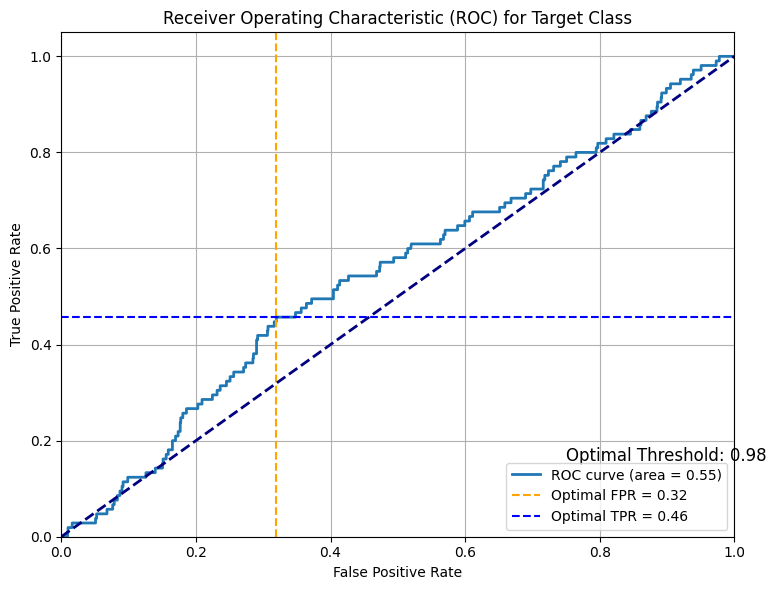

In [41]:
import os
import numpy as np
from ultralytics import YOLO
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Load your YOLOv8 model
model = YOLO('best36_class.pt')

# Folder containing images (with no subfolders for classes)
base_folder = 'dsds/val/images'  # Update with your actual folder path

# Initialize lists to store ground truth and predicted confidence scores
y_true = []
y_scores = []

# Load your labels from the text file
with open('labels36class.txt', 'r') as f:  # Update with your labels file path
    labels = [line.strip() for line in f.readlines()]

# Assuming you want to focus on a specific target class
target_class_index = 1  # Change this to the index of your target class (e.g., 1 for 'Bayabas')

# Loop through the images in the base folder
for file in os.listdir(base_folder):
    if file.endswith(('.jpg', '.png', '.jpeg')):  # Add other formats as needed
        image_path = os.path.join(base_folder, file)

        # Run inference on the image using YOLOv8
        results = model.predict(image_path, save=True, imgsz=640, conf=0.5)

        # Initialize true label for the target class
        true_label = 0  # 0 for no detection

        # Check if the target class is detected
        if results and results[0].boxes:
            for box in results[0].boxes:
                class_index = int(box.cls)
                if class_index == target_class_index:
                    true_label = 1  # 1 if the target class is detected

        # Append true label and max confidence score
        y_true.append(true_label)
        max_conf = max(results[0].boxes.conf) if results and results[0].boxes else 0
        y_scores.append(max_conf.cpu().numpy() if isinstance(max_conf, torch.Tensor) else max_conf)

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_scores = np.array(y_scores)  # Now this should work

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_scores)

# Calculate the optimal threshold using Youden's J statistic
J = tpr - fpr
optimal_idx = np.argmax(J)
optimal_threshold = thresholds[optimal_idx]
optimal_tpr = tpr[optimal_idx]
optimal_fpr = fpr[optimal_idx]

# Print optimal threshold and corresponding TPR, FPR
print(f"Optimal Threshold: {optimal_threshold:.2f}")
print(f"True Positive Rate at Optimal Threshold: {optimal_tpr:.2f}")
print(f"False Positive Rate at Optimal Threshold: {optimal_fpr:.2f}")

# Simplified Plotting of ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = {:.2f})'.format(auc(fpr, tpr)))

# Plot dashed lines for the optimal threshold
plt.axvline(x=optimal_fpr, color='orange', linestyle='--', label='Optimal FPR = {:.2f}'.format(optimal_fpr))
plt.axhline(y=optimal_tpr, color='blue', linestyle='--', label='Optimal TPR = {:.2f}'.format(optimal_tpr))

# Annotate the optimal threshold value on the right side of the figure
plt.text(0.75, 0.15, f'Optimal Threshold: {optimal_threshold:.2f}', fontsize=12, verticalalignment='bottom', color='black')

# Basic plot settings
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for Target Class')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()  # Adjust layout
plt.show()
